In [1]:
%%time
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import time
import seaborn as sns
from shapely.geometry import Point, Polygon
import os
import usaddress
from ast import literal_eval
import operator
import math

%matplotlib inline

CPU times: user 1.68 s, sys: 666 ms, total: 2.35 s
Wall time: 3.18 s


In [2]:
def create_gdp(df, latitude='latitude', longitude='longitude'):
    crs = {'init': 'epsg:4326'}
    geometry = [Point(xy) for xy in zip(df[longitude], df[latitude])]
    return gpd.GeoDataFrame(df.copy(), crs=crs, geometry=geometry)


def distance(coor1, coor2):
    r = 6371000
    lat1 = coor1[0]
    lng1 = coor1[1]
    lat2 = coor2[0]
    lng2 = coor2[1]
    phi1 = math.radians(lat1)
    phi2 = math.radians(lat2)
    deltaphi = math.radians(lat2 - lat1)
    deltalambda = math.radians(lng2 - lng1)
    a = math.sin(deltaphi/2)**2 + math.cos(phi1) * math.cos(phi2) * math.sin(deltalambda/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    return c * r

def get_buffer(radius):
    count = 0
    thresh = .000001
    double = 0
    x_list = [0]

    co = [42.35, -71.13], [42.35, -71.1317]

    x = -71.1317

    while abs(distance([42.35, -71.13], [42.35, x]) - radius) > thresh:
        if distance([42.35, -71.13], [42.35, x]) - radius > thresh:
            x += 1/(100 * (count + 1))
            count += 1
            x = round(x, 6)
            x_list.append(x)
            if x_list[-1] == x_list[-2]:
                break

        elif distance([42.35, -71.13], [42.35, x]) - radius < thresh:
            x -= 1/(100 * (count + 1))
            count += 1
            x = round(x, 6)
            x_list.append(x)
            if x_list[-1] == x_list[-2]:
                break

    return round(abs(x - -71.13), 6)

In [3]:
crs = {'init': 'epsg:4326'}
bos = gpd.read_file('City_of_Boston_Boundary/City_of_Boston_Boundary.shp')
ms = gpd.read_file('revised_main_streets/revised_main_streets.shp')

In [338]:
s_point = gpd.GeoDataFrame()

s_coords = [42.353802, -71.137512]
# s_coords = [42.350157, -71.132102]

s_point['latitude'] = [s_coords[0]]
s_point['longitude'] = [s_coords[1]]

gs_point = create_gdp(s_point)

/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [339]:
intersection = gs_point.intersection(ms.buffer(0).unary_union)
intersection

0    POINT (-71.13751 42.35380)
dtype: geometry

[-71.14, -71.125, 42.346, 42.3575]

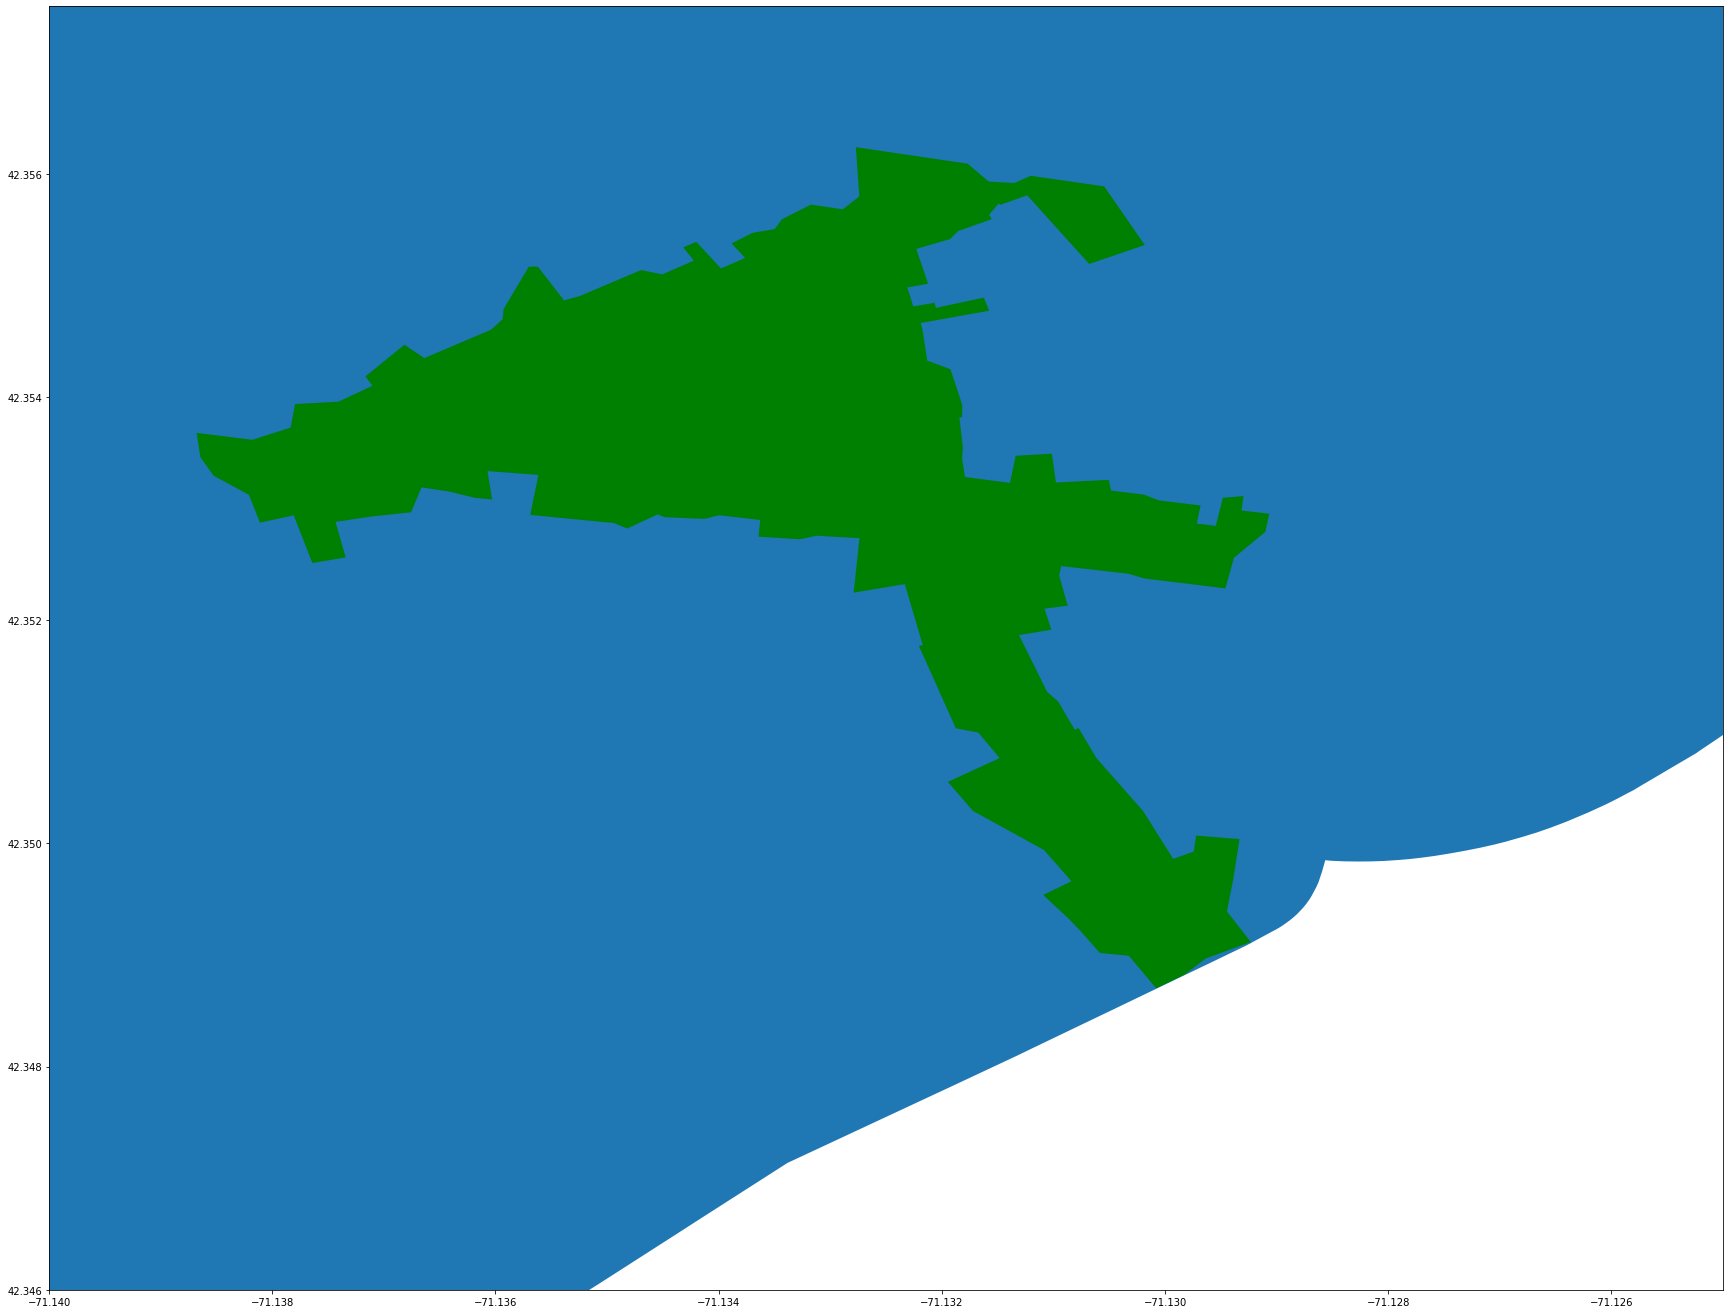

In [337]:
base = bos.plot(figsize=(30,30))
ms.plot(ax=base, color='g')
gs_point.plot(ax=base, color='k')
plt.axis([-71.14, -71.125, 42.346, 42.3575])

In [ ]:
allston_in_bing = pd.read_csv(r'allston_in_bing.csv')
galls_in_bing = create_gdp(allston_in_bing, longitude='LON', latitude='LAT')

base = bos.plot(figsize=(30,30))
gs_point.buffer(.01).plot(ax=base, color='y')
ms.buffer(.001826).plot(ax=base, color='g')
galls.plot(ax=base, color='k')
plt.axis([-71.155, -71.12, 42.343, 42.37])

# plt.savefig('allston_in_bing.png')

/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


[-71.14, -71.125, 42.346, 42.3575]

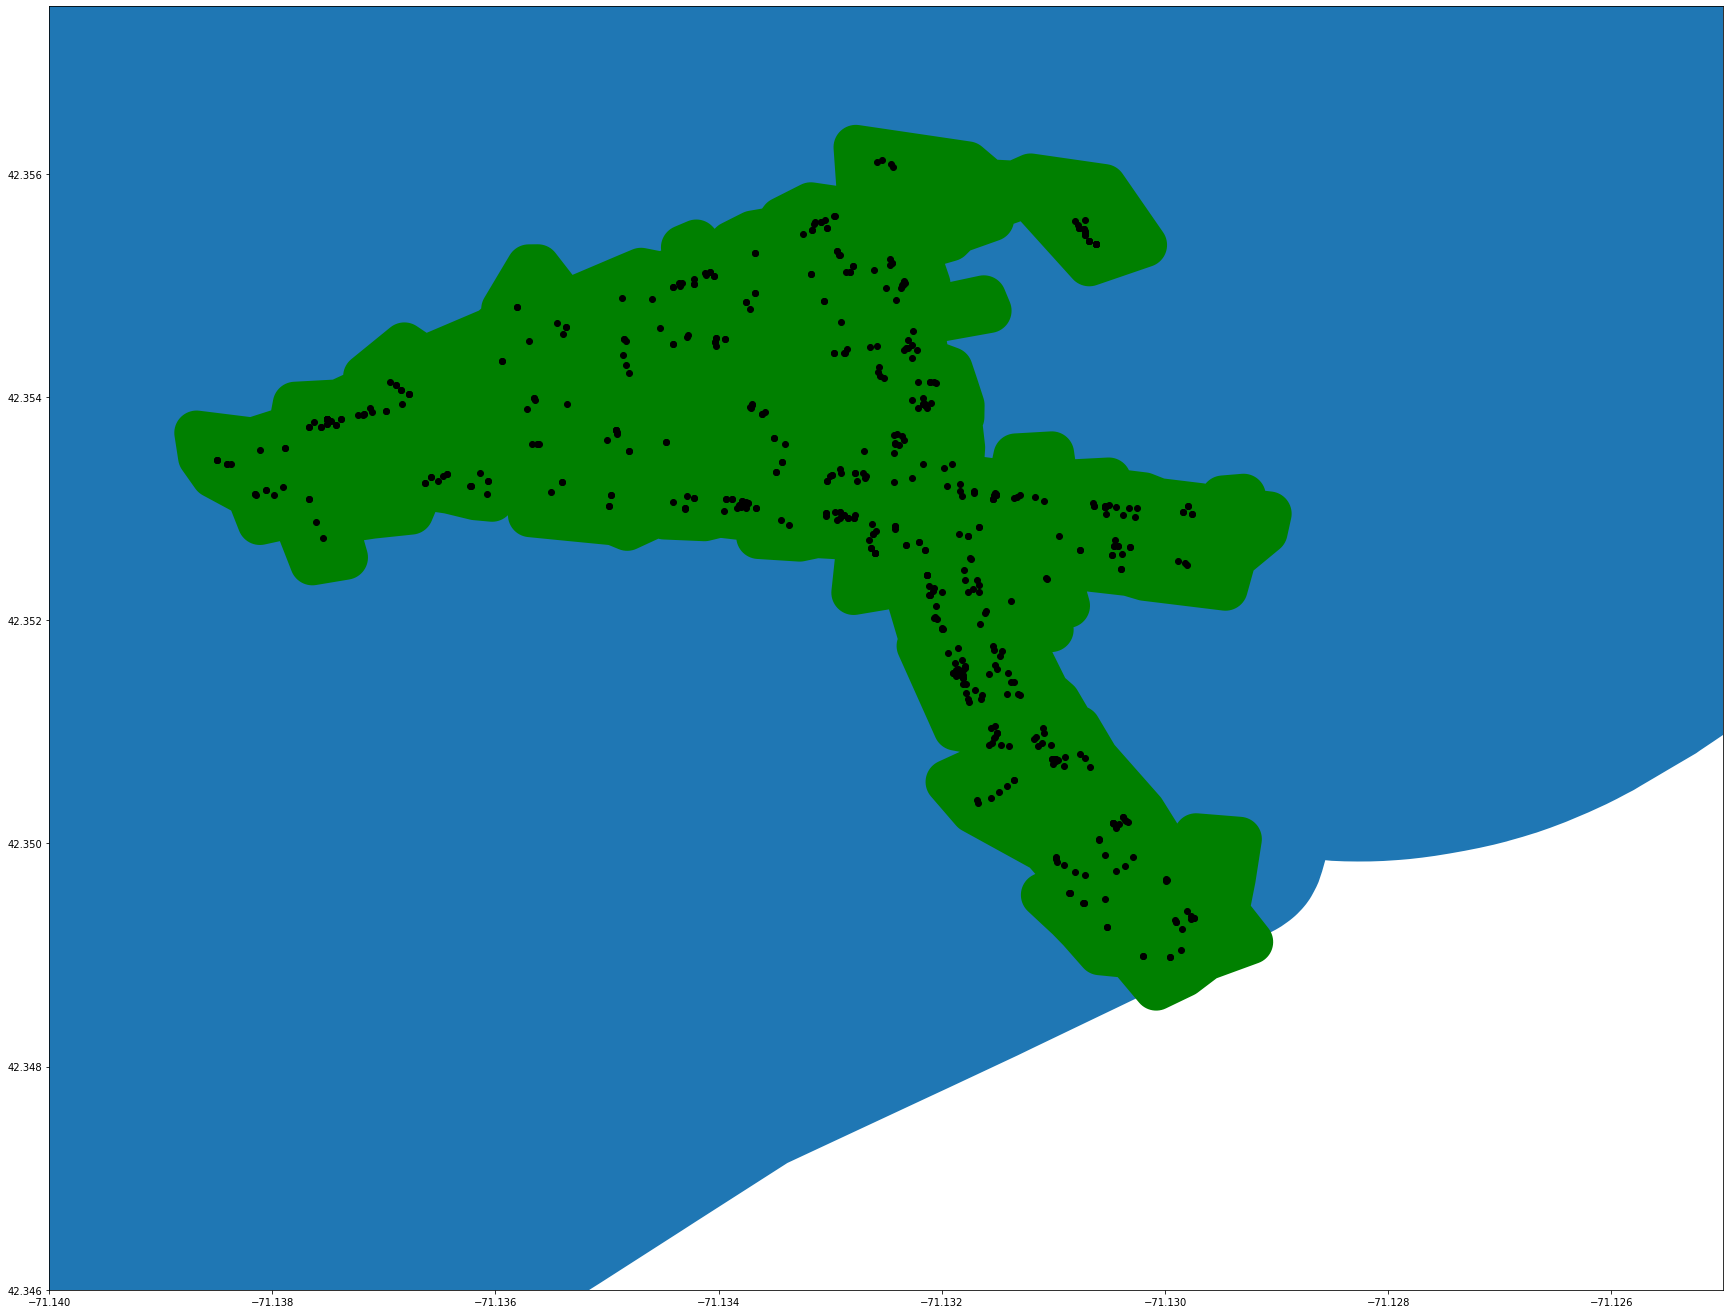

In [42]:
allston_intersect = pd.read_excel("allston_in_bing-intersect-revised_main_streets.xlsx")
galls_intersect = create_gdp(allston_intersect, longitude='LON', latitude='LAT')

base = bos.plot(figsize=(30,30))
ms.buffer(.0002).plot(ax=base, color='g')
galls_intersect.plot(ax=base, color='k')

plt.axis([-71.14, -71.125, 42.346, 42.3575])

# plt.savefig('allston_in_bing-intersect-revised_main_streets.png')

/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


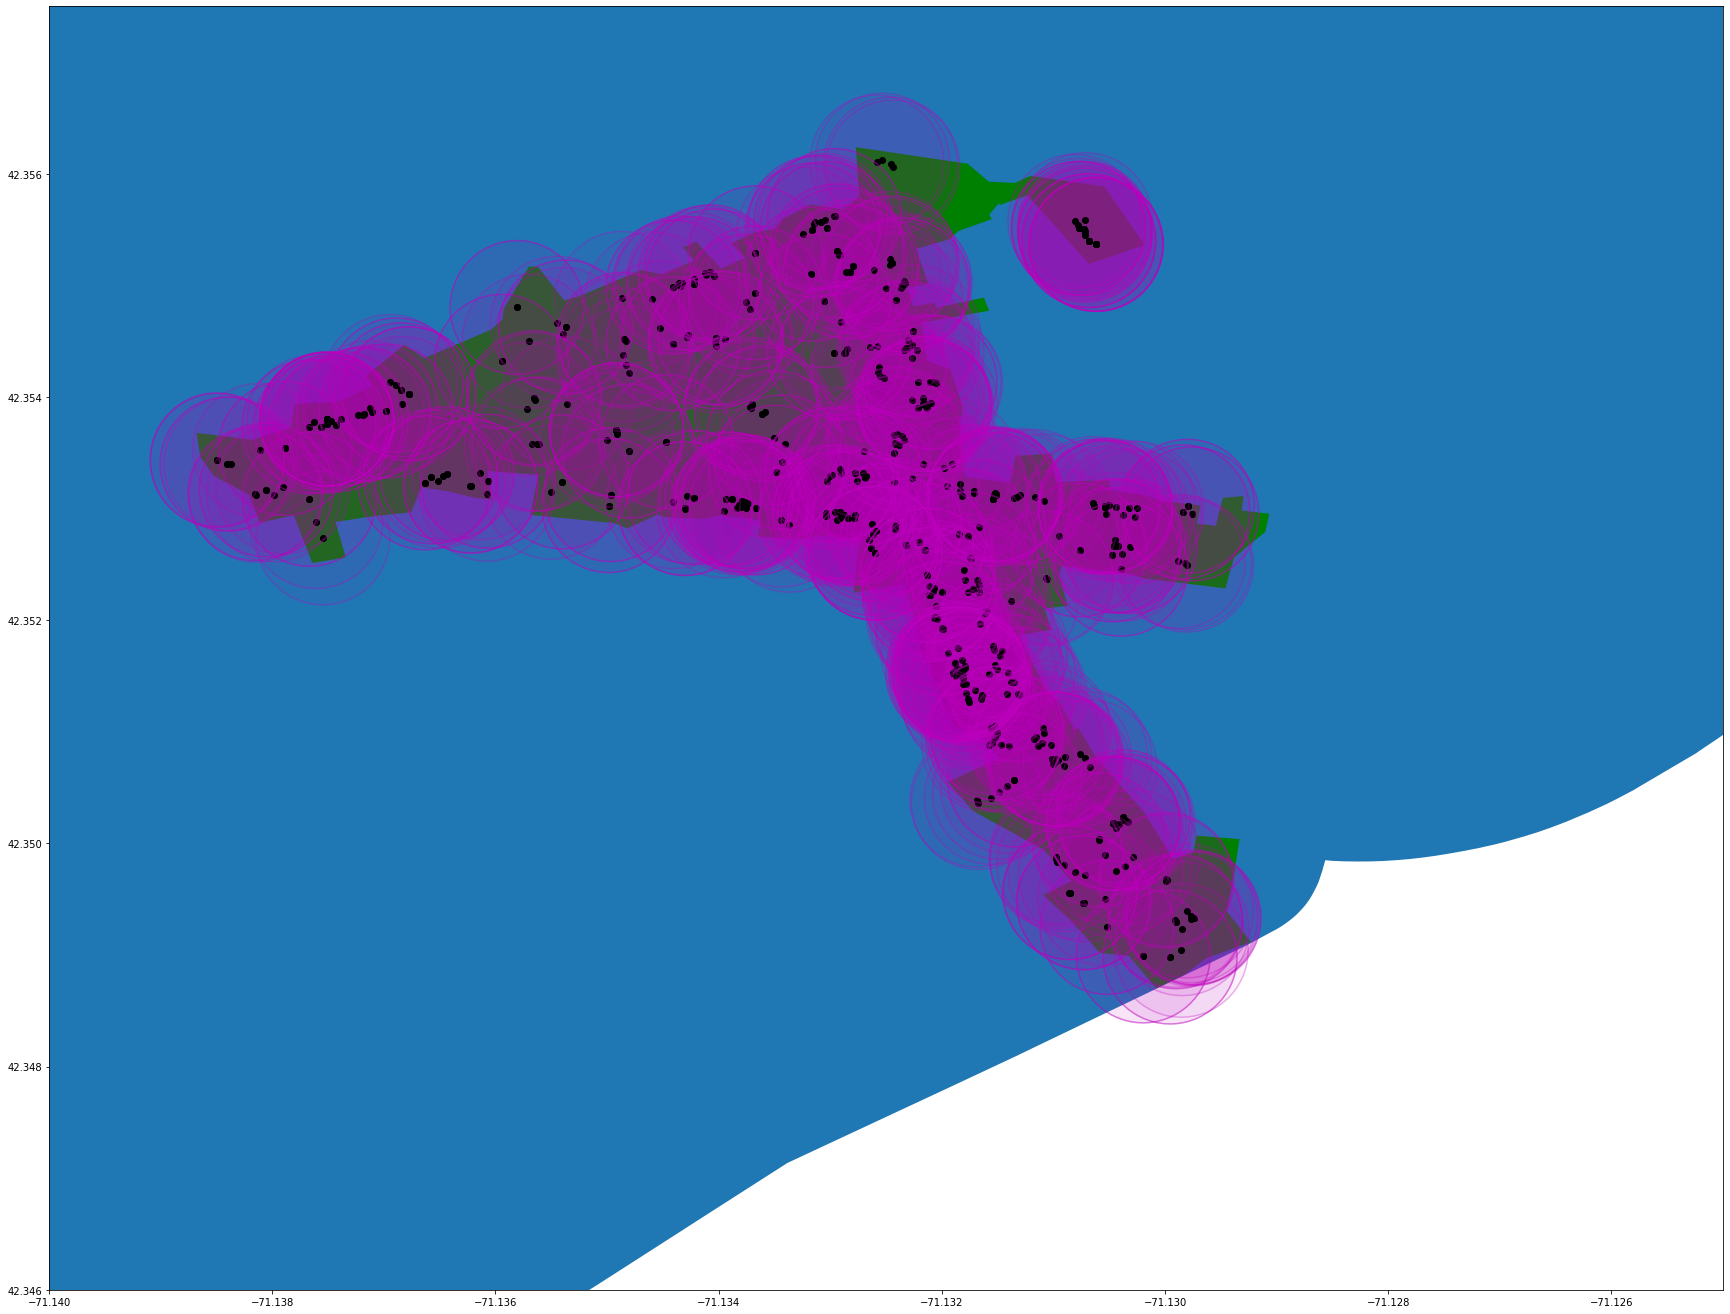

In [39]:
allston_intersect = pd.read_excel("allston_in_bing-intersect-revised_main_streets.xlsx")
galls_intersect = create_gdp(allston_intersect, longitude='LON', latitude='LAT')

base = bos.plot(figsize=(30,30))
galls_intersect.buffer(.0006).boundary.plot(ax=base, color='m', alpha=.3)
ms.plot(ax=base, color='g')
galls_intersect.buffer(.0006).plot(ax=base, color='m', alpha=.05)
galls_intersect.plot(ax=base, color='k')

plt.axis([-71.14, -71.125, 42.346, 42.3575])
plt.savefig('allston_in_bing_overlap.png')

/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


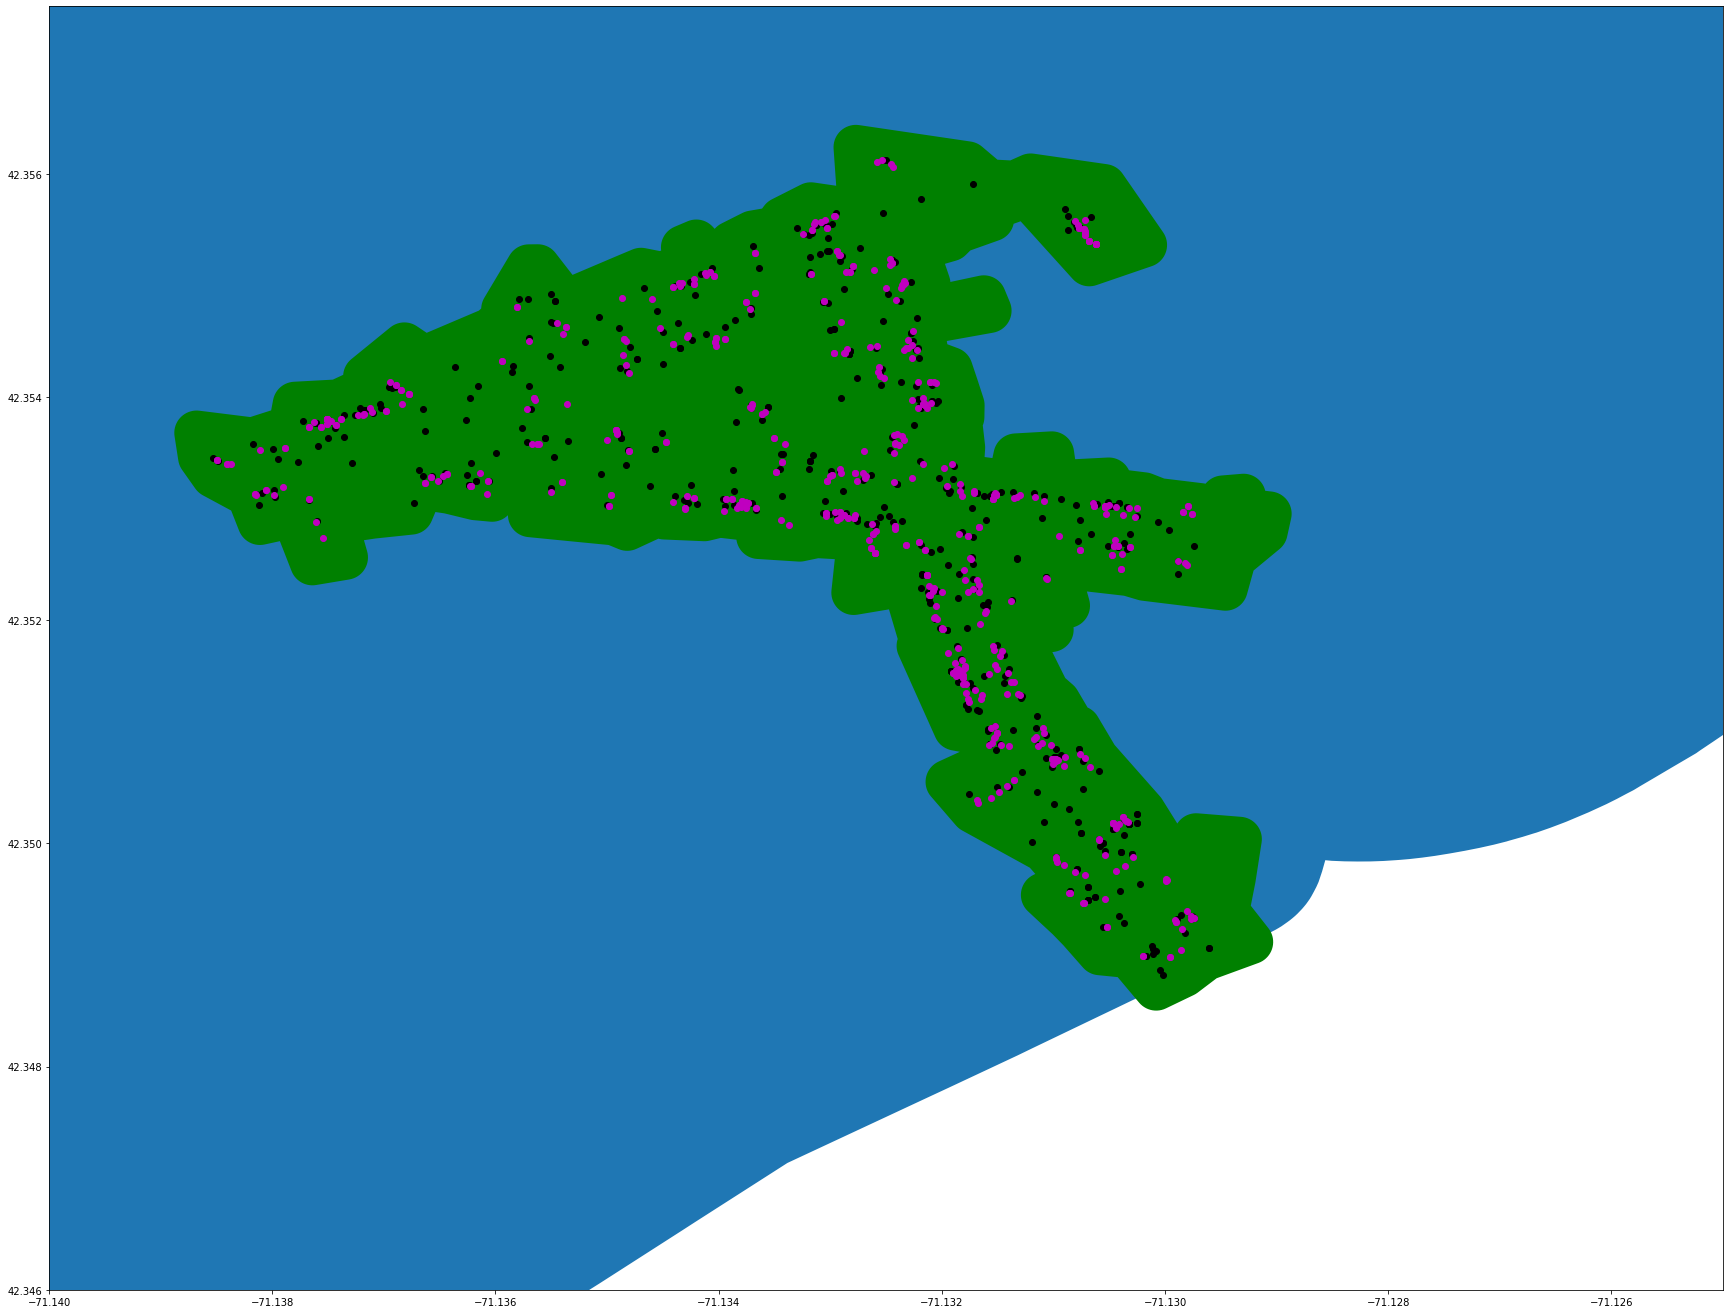

In [43]:
alls_in_google = pd.read_excel("new_method_google_complete.xlsx")
galls_in_google = create_gdp(alls_in_google, longitude='longitude', latitude='latitude')

alls_in_bing = pd.read_excel("allston_in_bing-intersect-revised_main_streets.xlsx")
galls_in_bing = create_gdp(alls_in_bing, longitude='LON', latitude='LAT')

base = bos.plot(figsize=(30,30))
ms.buffer(.0002).plot(ax=base, color='g')
galls_in_google.plot(ax=base, color='k') # black points are all businesses found in Google
galls_in_bing.plot(ax=base, color='m') # magenta points are all businesses found in Bing

plt.axis([-71.14, -71.125, 42.346, 42.3575])
# plt.axis([-71.155, -71.12, 42.343, 42.37])

# plt.savefig('allston_in_bing-difference-allston_in_google.png')

In [32]:
df1 = pd.read_csv('allston_in_bing_but_not_in_google.csv')
gdf1 = create_gdp(df1, longitude='LON', latitude='LAT')

df2 = pd.read_csv('allston_in_google_but_not_in_bing.csv')
gdf2 = create_gdp(df2, longitude='longitude', latitude='latitude')

df3 = pd.read_csv('allston_in_both_google_and_bing.csv')
gdf3 = create_gdp(df3, longitude='LON', latitude='LAT')

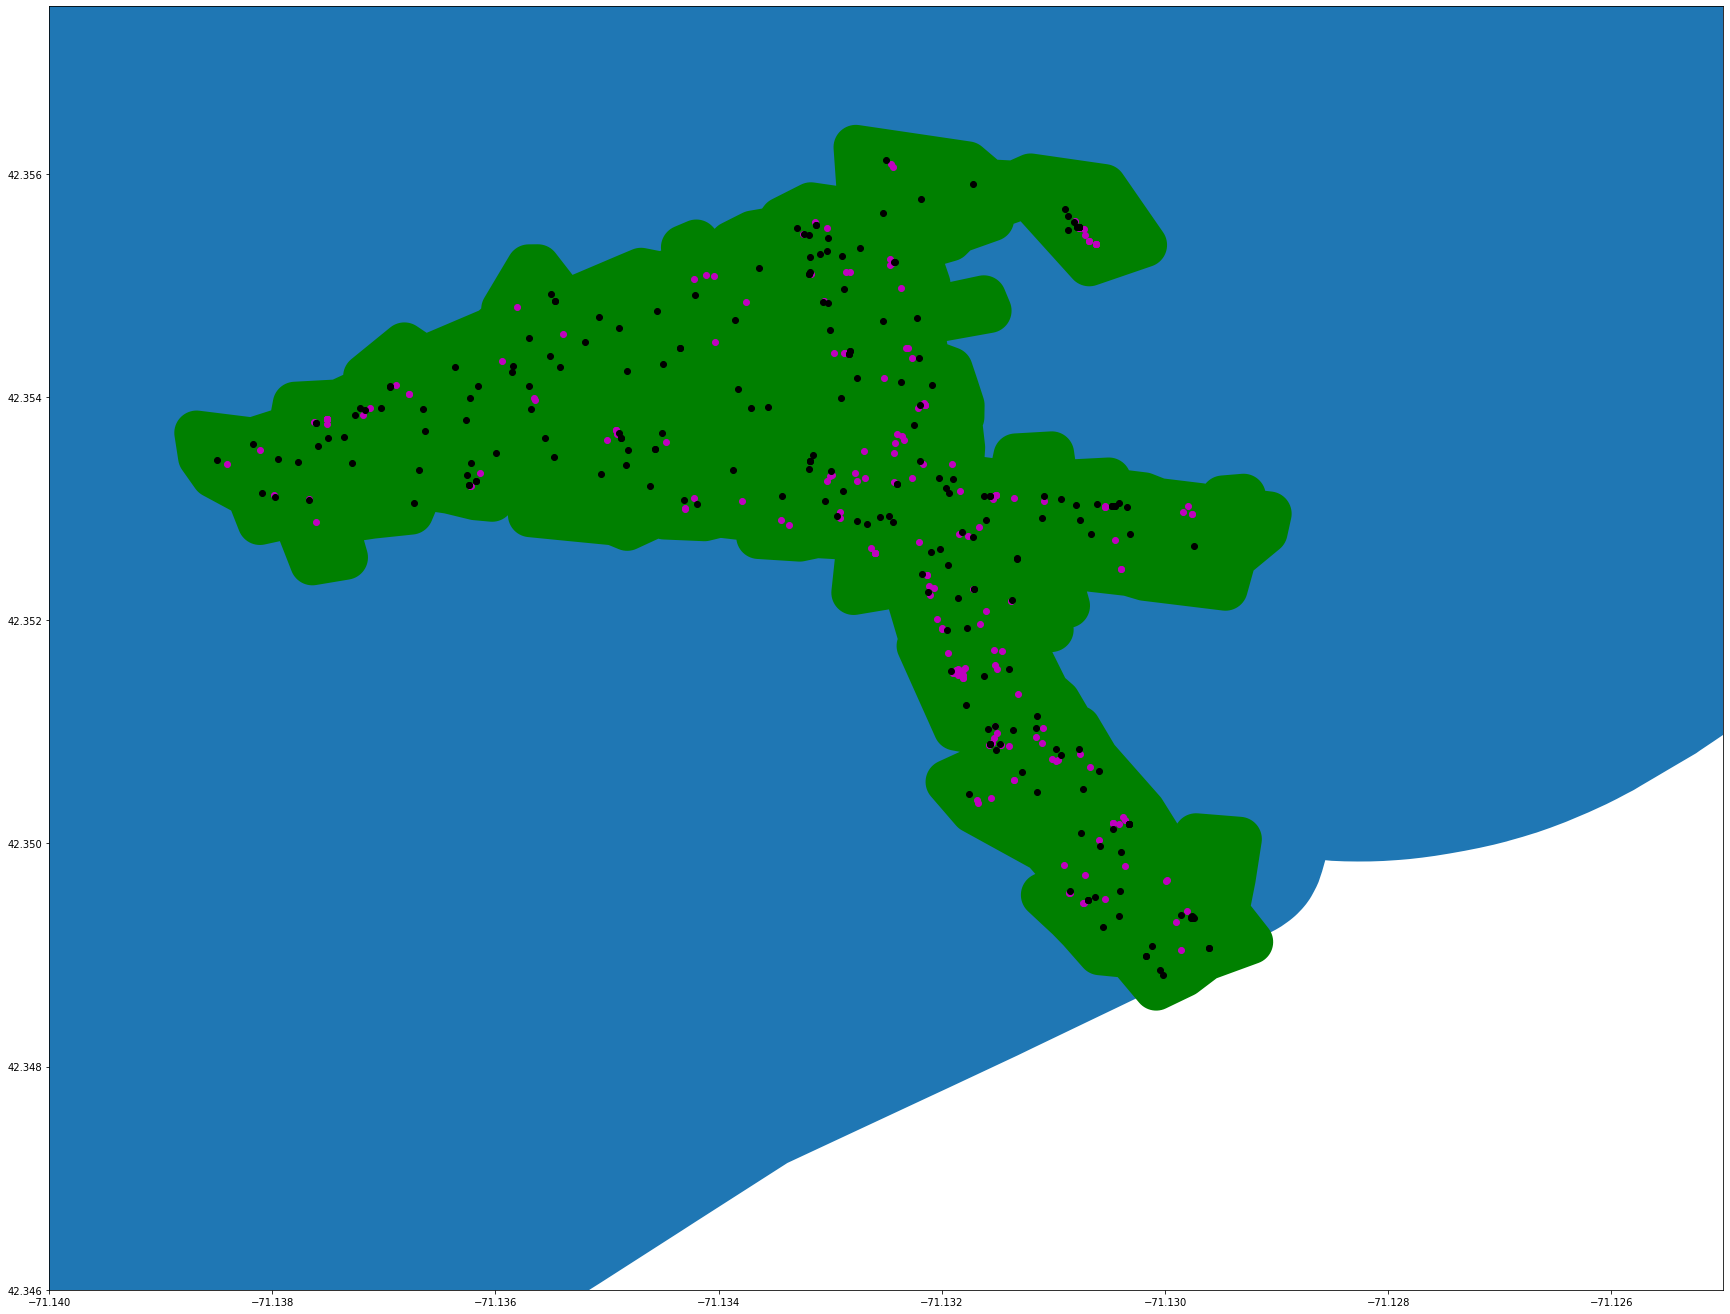

In [44]:
base = bos.plot(figsize=(30,30))
ms.buffer(.0002).plot(ax=base, color='g')  # green area - main streets area
gdf1.plot(ax=base, color='m')  # magenta points are the businesses found in Bing but not in Google
gdf2.plot(ax=base, color='k')  # black points are the businesses found in Google but not in Bing

plt.axis([-71.14, -71.125, 42.346, 42.3575])

plt.savefig('difference_between_bing_and_google.png')

[-71.14, -71.125, 42.346, 42.3575]

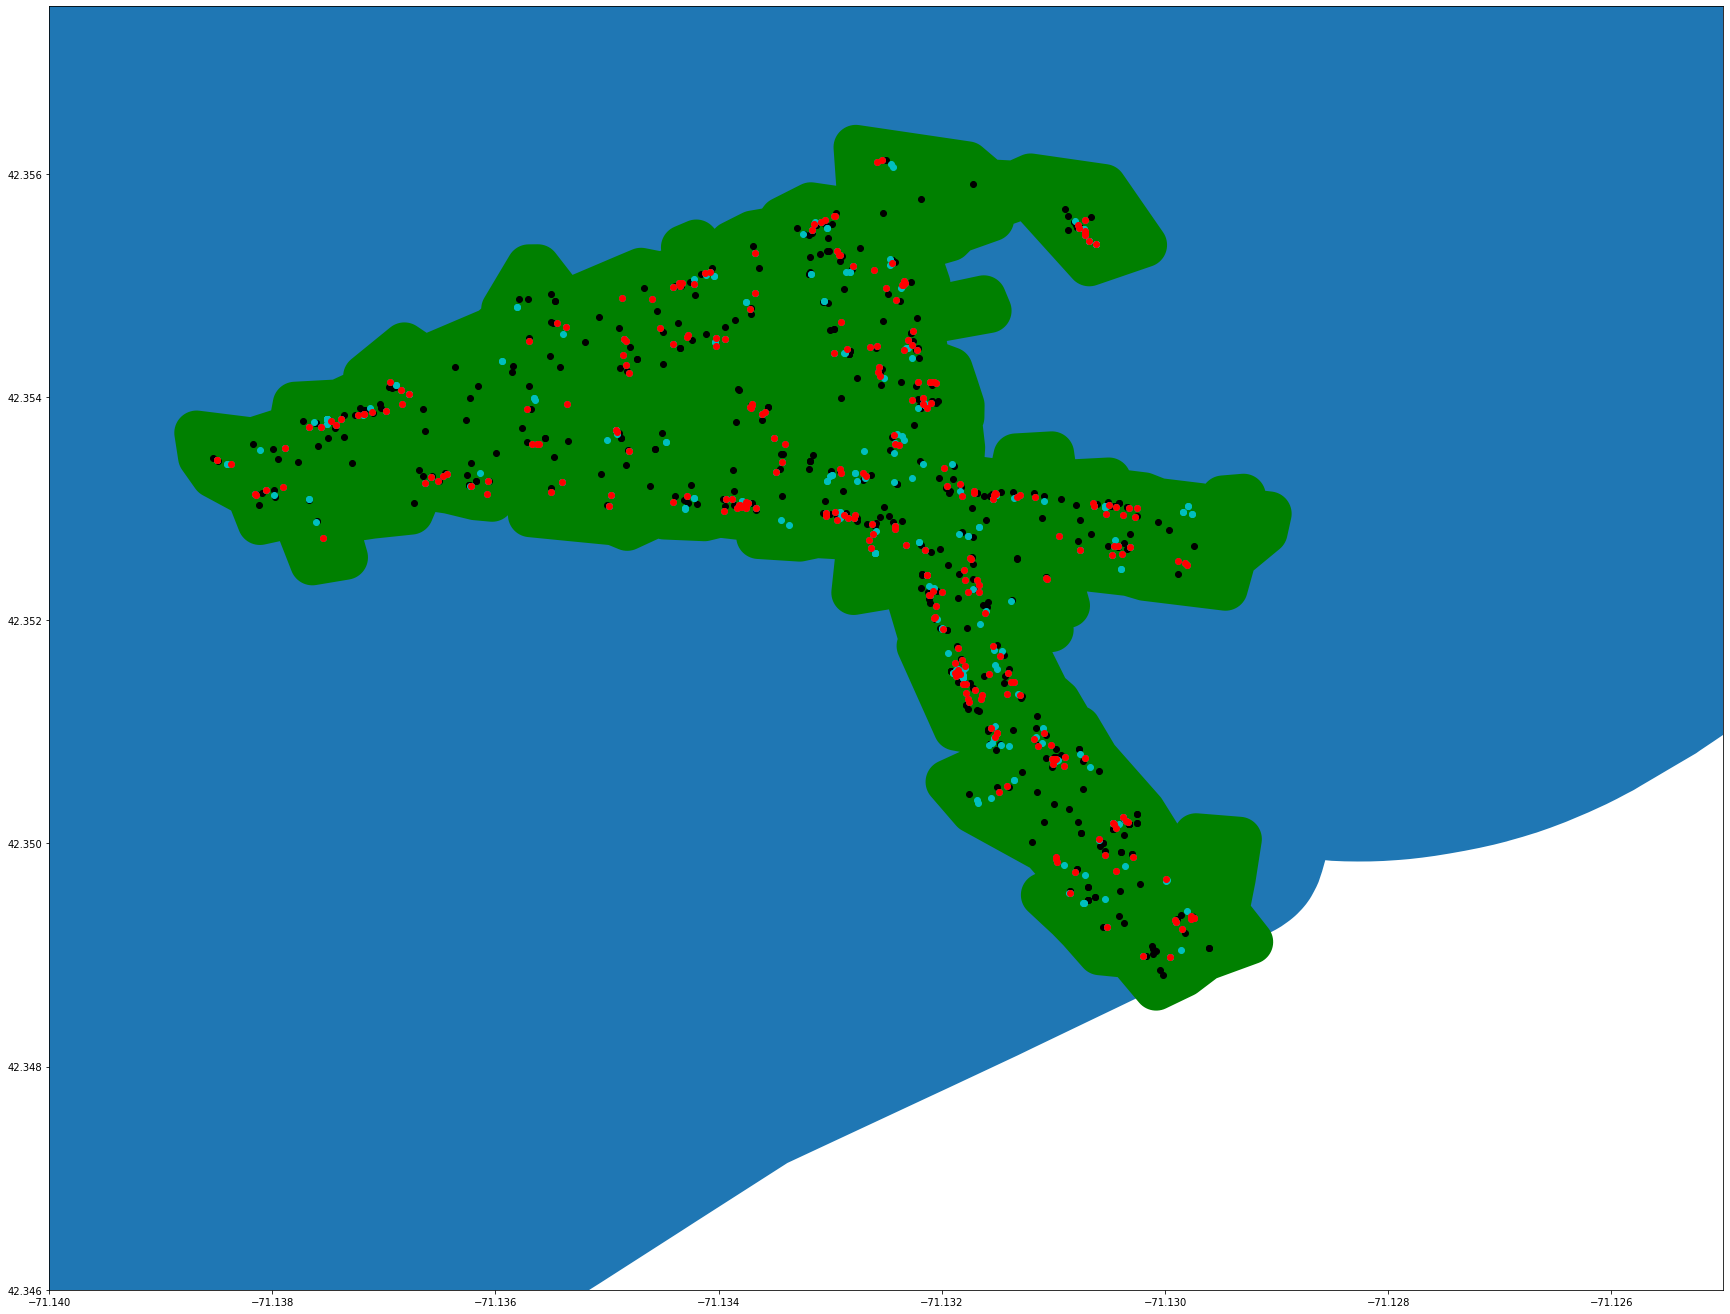

In [48]:
base = bos.plot(figsize=(30,30))
ms.buffer(.0002).plot(ax=base, color='g')  # green area - main streets area
galls_in_google.plot(ax=base, color='k')  # black points are all businesses found in Google
galls_in_bing.plot(ax=base, color='c')  # cyan points are all businesses found in Bing
gdf3.plot(ax=base, color='r')  # red points are the businesses found in both Google and Bing

plt.axis([-71.14, -71.125, 42.346, 42.3575])

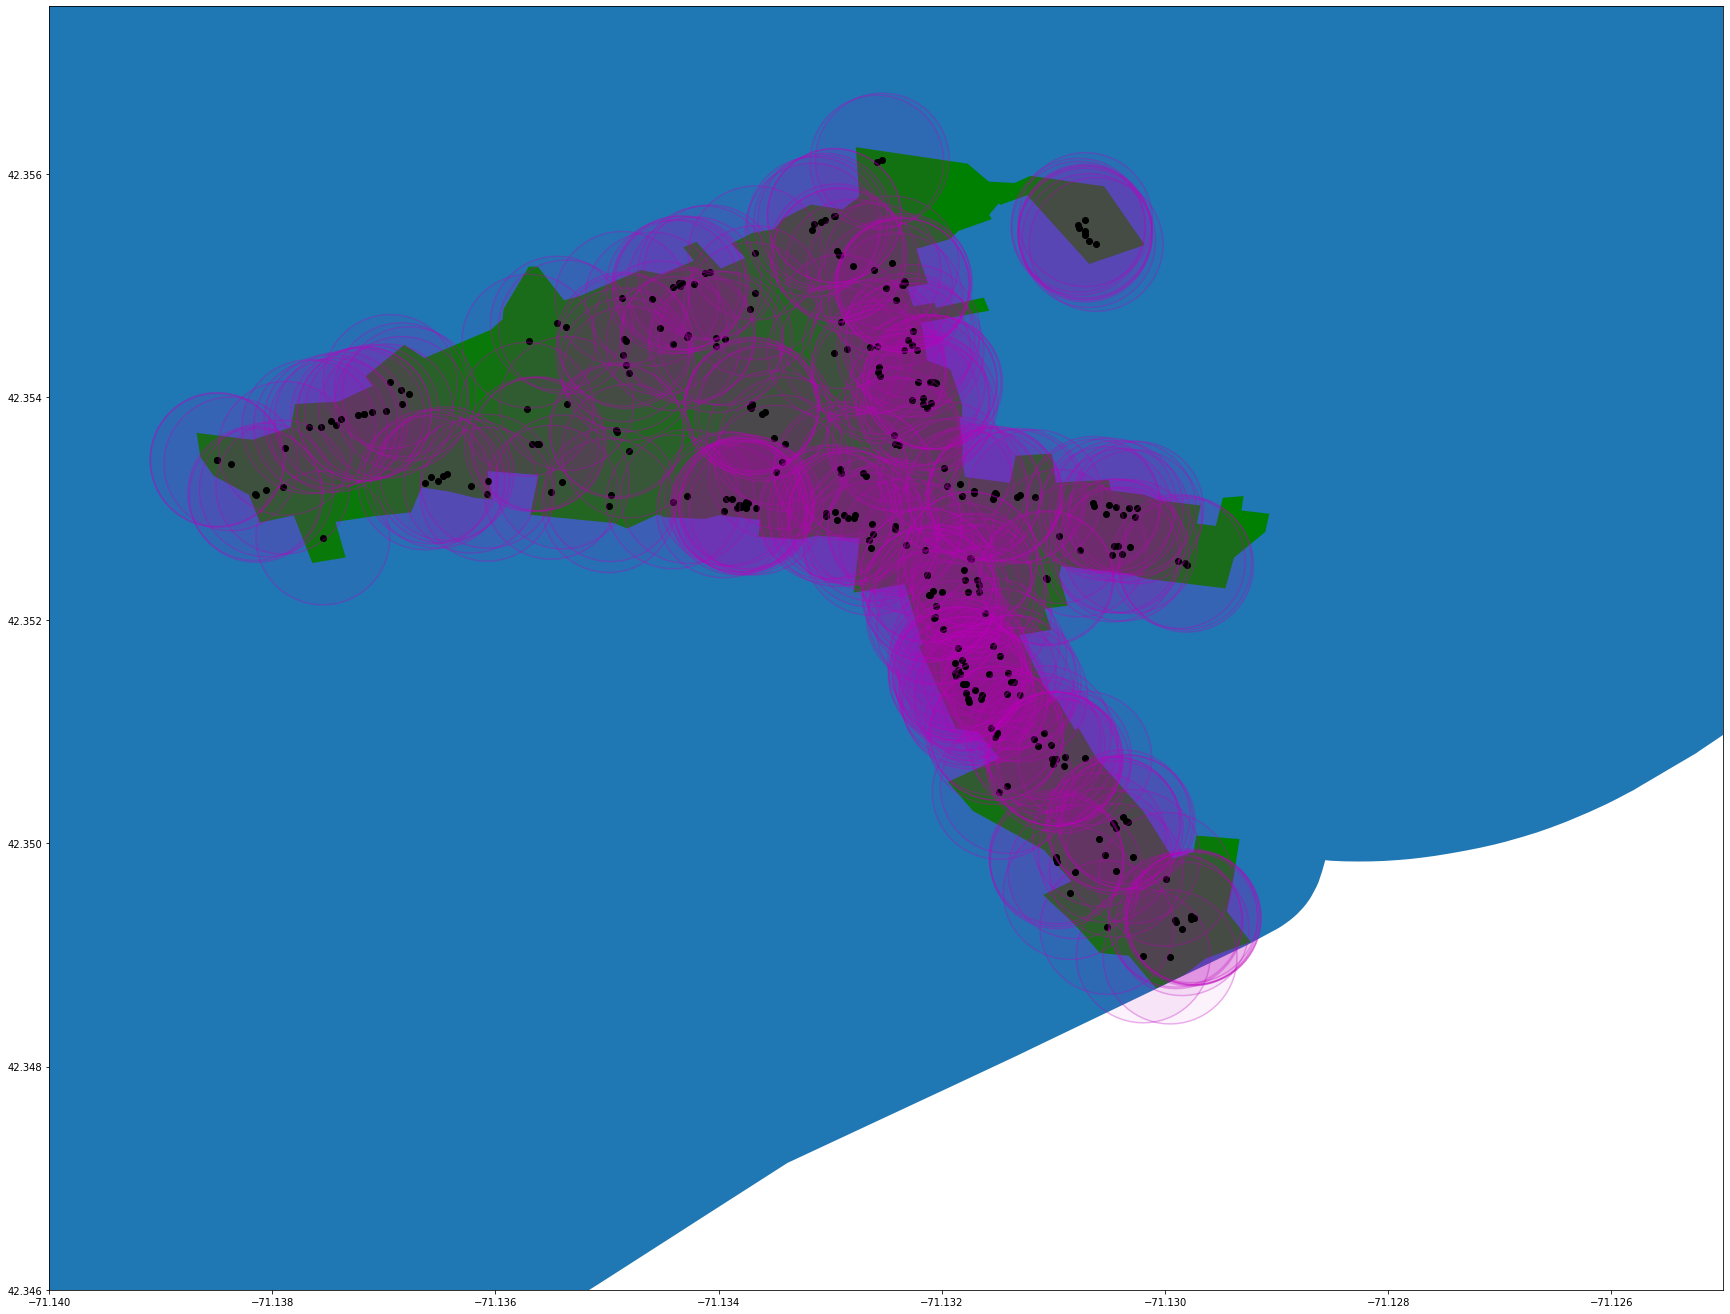

In [49]:
base = bos.plot(figsize=(30,30))
gdf3.buffer(.0006).boundary.plot(ax=base, color='m', alpha=.3)
ms.plot(ax=base, color='g')
gdf3.buffer(.0006).plot(ax=base, color='m', alpha=.05)
gdf3.plot(ax=base, color='k')

plt.axis([-71.14, -71.125, 42.346, 42.3575])
plt.savefig('allston_in_both_bing_and_google.png')

/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


[-71.14, -71.125, 42.346, 42.3575]

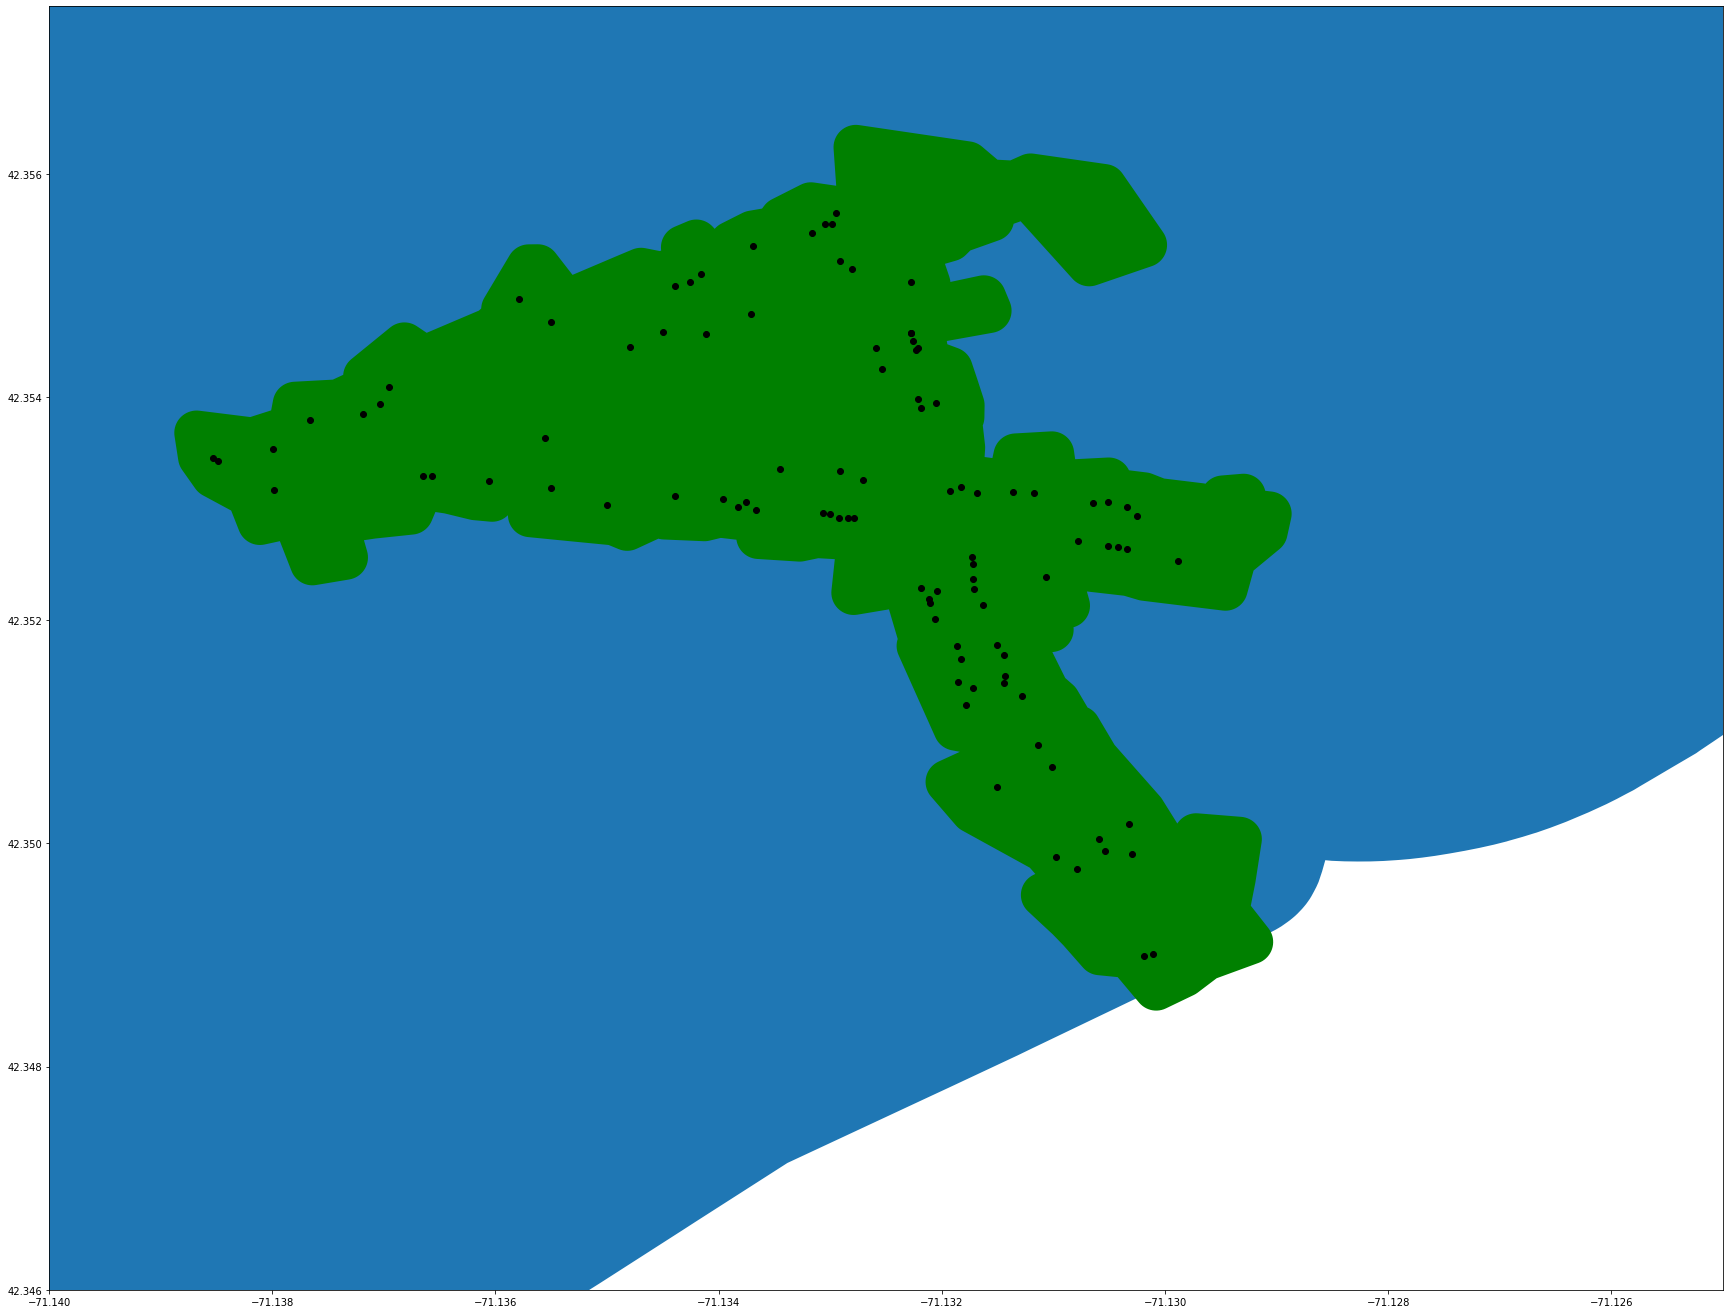

In [35]:
in_all_four_lists = pd.read_csv('in_all_four_lists.csv')
g1 = create_gdp(in_all_four_lists, longitude='longitude', latitude='latitude')

base = bos.plot(figsize=(30,30))
ms.buffer(.0002).plot(ax=base, color='g')  # green area - main streets area
g1.plot(ax=base, color='k')  # red points are the businesses found in all four lists (BU, InfoUSA, Google, Bing)

plt.axis([-71.14, -71.125, 42.346, 42.3575])